In [86]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model

In [87]:
df_claims = pd.read_csv('../0.data/Claims.csv')
df_drug = pd.read_csv('../0.data/DrugCount.csv')
df_lab = pd.read_csv('../0.data/LabCount.csv')
df_member = pd.read_csv('../0.data/Members.csv')
df_Y2 = pd.read_csv('../0.data/DaysInHospital_Y2.csv')
df_Y3 = pd.read_csv('../0.data/DaysInHospital_Y3.csv')


In [3]:
df_claims.head()

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0
2,2759427,2997752.0,140343.0,91972.0,Y3,Internal,Office,14,NaN,0- 1 month,METAB3,0,EM,0
3,73570559,7053364.0,240043.0,70119.0,Y3,Laboratory,Independent Lab,24,NaN,5- 6 months,METAB3,1-2,SCS,0
4,11837054,7557061.0,496247.0,68968.0,Y2,Surgery,Outpatient Hospital,27,NaN,4- 5 months,FXDISLC,1-2,EM,0


In [4]:
df_claims.shape

(2668990, 14)

In [5]:
df_claims.describe()

,MemberID,ProviderID,Vendor,PCP,SupLOS
count,2.668990e+06,2.652726e+06,2.644134e+06,2.661498e+06,2.668990e+06
mean,4.998824e+07,5.070900e+06,3.806974e+05,5.133819e+04,4.245801e-03
std,2.892240e+07,2.868035e+06,2.729317e+05,2.920591e+04,6.502135e-02
min,4.000000e+00,4.720000e+02,3.900000e+01,7.400000e+01,0.000000e+00
25%,2.480119e+07,2.467684e+06,1.526100e+05,2.746700e+04,0.000000e+00
50%,4.992606e+07,5.442161e+06,2.518090e+05,4.799000e+04,0.000000e+00
75%,7.532789e+07,7.053364e+06,5.885440e+05,7.587600e+04,0.000000e+00
max,9.999882e+07,9.999241e+06,9.998740e+05,9.990500e+04,1.000000e+00


In [6]:
df_claims.dtypes

MemberID                   int64
ProviderID               float64
Vendor                   float64
PCP                      float64
Year                      object
Specialty                 object
PlaceSvc                  object
PayDelay                  object
LengthOfStay              object
DSFS                      object
PrimaryConditionGroup     object
CharlsonIndex             object
ProcedureGroup            object
SupLOS                     int64
dtype: object

In [7]:
def count_missing(df):   
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(20))
    return missing_data

count_missing(df_claims)

                         Total   Percent
LengthOfStay           2597392  0.973174
DSFS                     52770  0.019772
Vendor                   24856  0.009313
ProviderID               16264  0.006094
PrimaryConditionGroup    11410  0.004275
Specialty                 8405  0.003149
PlaceSvc                  7632  0.002860
PCP                       7492  0.002807
ProcedureGroup            3675  0.001377
SupLOS                       0  0.000000
CharlsonIndex                0  0.000000
PayDelay                     0  0.000000
Year                         0  0.000000
MemberID                     0  0.000000


,Total,Percent
LengthOfStay,2597392,0.973174
DSFS,52770,0.019772
Vendor,24856,0.009313
ProviderID,16264,0.006094
PrimaryConditionGroup,11410,0.004275
Specialty,8405,0.003149
PlaceSvc,7632,0.002860
PCP,7492,0.002807
ProcedureGroup,3675,0.001377
SupLOS,0,0.000000


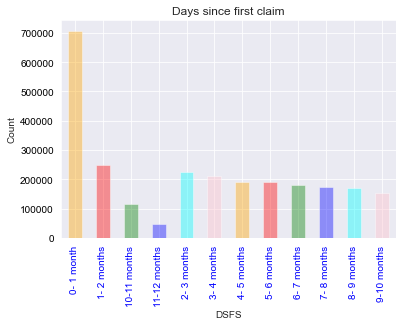

In [69]:
import seaborn as sns # Library for plotting
import itertools

color = sns.color_palette()
sns.set_style('darkgrid')

plt.title("Days since first claim")
plt.ylabel('Count')
plt.xlabel('Month')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='black')
my_colors = ['orange', 'red', 'green', 'blue', 'cyan', 'pink']

df_claims.groupby(['DSFS']).size().plot( 
    kind='bar',
    alpha=0.4, linewidth=1,
    color=my_colors
)


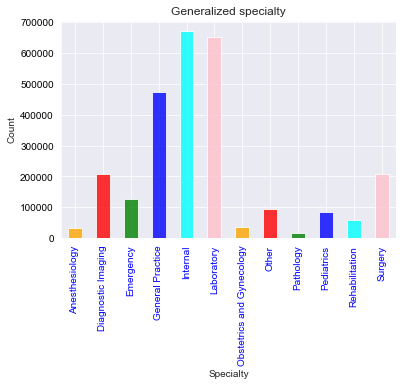

In [70]:
color = sns.color_palette()
sns.set_style('darkgrid')

plt.title("Generalized specialty")
plt.ylabel('Count')
plt.xlabel('Specialty')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='black')
my_colors = ['orange', 'red', 'green', 'blue', 'cyan', 'pink']

df_claims.groupby(['Specialty']).size().plot( 
    kind='bar',
    alpha=0.8, linewidth=1,
    color=my_colors
)

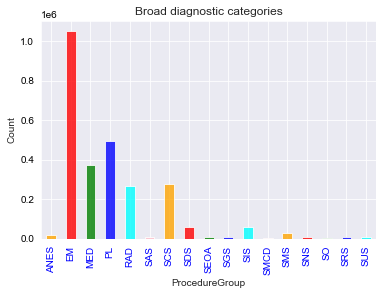

In [71]:
color = sns.color_palette()
sns.set_style('darkgrid')

plt.title("Broad diagnostic categories")
plt.ylabel('Count')
plt.xlabel('ProcedureGroup')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='black')
my_colors = ['orange', 'red', 'green', 'blue', 'cyan', 'pink']

df_claims.groupby(['ProcedureGroup']).size().plot( 
    kind='bar',
    alpha=0.8, linewidth=1,
    color=my_colors
)

In [72]:
df_claims['PCP'].fillna((df_claims['PCP'].mean()), inplace=True)

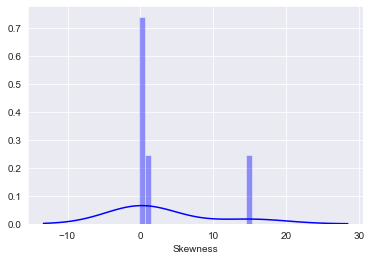

In [73]:
sns.distplot(df_claims.skew(),color='blue',axlabel ='Skewness')

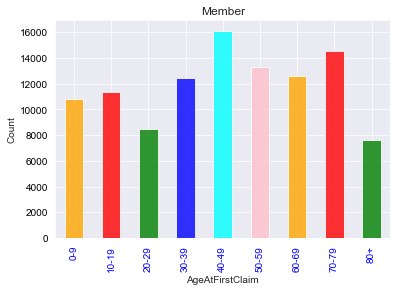

In [88]:
plt.title("Member")
plt.ylabel('Count')
plt.xlabel('Times')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='black')
my_colors = ['orange', 'red', 'green', 'blue', 'cyan', 'pink']

df_member.groupby(['AgeAtFirstClaim']).size().plot( 
    kind='bar',
    alpha=0.8, linewidth=1,
    color=my_colors
)

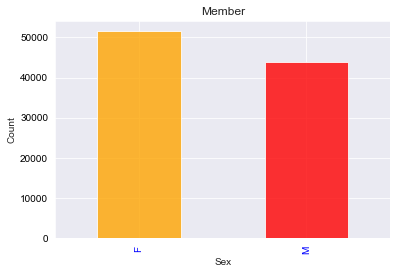

In [89]:
plt.title("Member")
plt.ylabel('Count')
plt.xlabel('Times')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='black')
my_colors = ['orange', 'red', 'green', 'blue', 'cyan', 'pink']

df_member.groupby(['Sex']).size().plot( 
    kind='bar',
    alpha=0.8, linewidth=1,
    color=my_colors
)

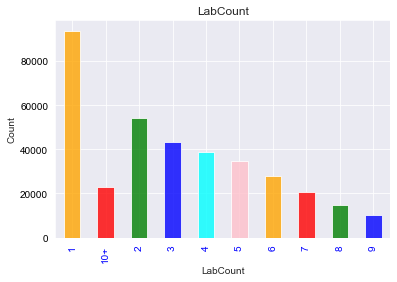

In [76]:
color = sns.color_palette()
sns.set_style('darkgrid')

plt.title("LabCount")
plt.ylabel('Count')
plt.xlabel('Times')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='black')
my_colors = ['orange', 'red', 'green', 'blue', 'cyan', 'pink']

df_lab.groupby(['LabCount']).size().plot( 
    kind='bar',
    alpha=0.8, linewidth=1,
    color=my_colors
)


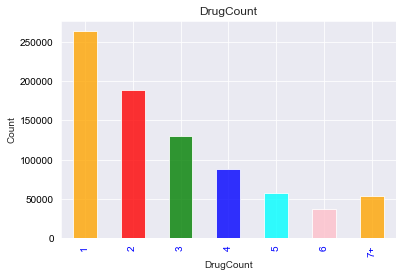

In [79]:
color = sns.color_palette()
sns.set_style('darkgrid')

plt.title("DrugCount")
plt.ylabel('Count')
plt.xlabel('Times')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='black')
my_colors = ['orange', 'red', 'green', 'blue', 'cyan', 'pink']

df_drug.groupby(['DrugCount']).size().plot( 
    kind='bar',
    alpha=0.8, linewidth=1,
    color=my_colors
)

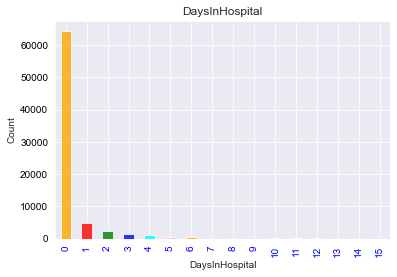

In [81]:
color = sns.color_palette()
sns.set_style('darkgrid')

plt.title("DaysInHospital")
plt.ylabel('Count')
plt.xlabel('Times')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='black')
my_colors = ['orange', 'red', 'green', 'blue', 'cyan', 'pink']

df_Y2.groupby(['DaysInHospital']).size().plot( 
    kind='bar',
    alpha=0.8, linewidth=1,
    color=my_colors
)

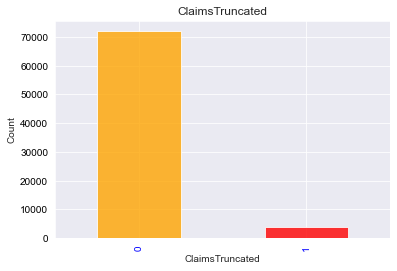

In [83]:
color = sns.color_palette()
sns.set_style('darkgrid')

plt.title("ClaimsTruncated")
plt.ylabel('Count')
plt.xlabel('Times')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='black')
my_colors = ['orange', 'red', 'green', 'blue', 'cyan', 'pink']

df_Y2.groupby(['ClaimsTruncated']).size().plot( 
    kind='bar',
    alpha=0.8, linewidth=1,
    color=my_colors
)

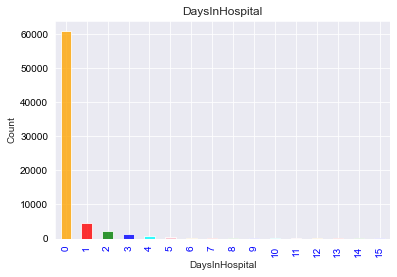

In [84]:
color = sns.color_palette()
sns.set_style('darkgrid')

plt.title("DaysInHospital")
plt.ylabel('Count')
plt.xlabel('Times')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='black')
my_colors = ['orange', 'red', 'green', 'blue', 'cyan', 'pink']

df_Y3.groupby(['DaysInHospital']).size().plot( 
    kind='bar',
    alpha=0.8, linewidth=1,
    color=my_colors
)

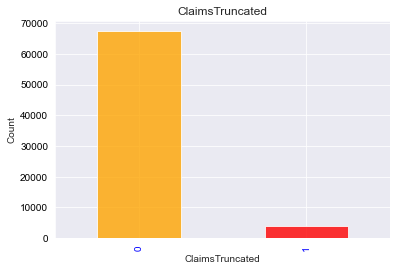

In [85]:
color = sns.color_palette()
sns.set_style('darkgrid')

plt.title("ClaimsTruncated")
plt.ylabel('Count')
plt.xlabel('Times')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='black')
my_colors = ['orange', 'red', 'green', 'blue', 'cyan', 'pink']

df_Y3.groupby(['ClaimsTruncated']).size().plot( 
    kind='bar',
    alpha=0.8, linewidth=1,
    color=my_colors
)